In [65]:
# ICT Data Exploration
# This notebook explores key ICT indicators for selected countries:
# - Internet usage
# - Household Internet access
# - Mobile and mobile-broadband subscriptions
# - ICT skills
# - Household expenditure on ICT
# - Global Cybersecurity Index
#
# Focus countries: Germany, Saudi Arabia, South Africa, Armenia, Afghanistan, Ukraine

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Folder containing CSV files
DATA_DIR = Path("../data")

In [67]:
# Load CSV files
df_ict_skills = pd.read_csv(DATA_DIR / "ict_skills.csv")
df_household_internet = pd.read_csv(DATA_DIR / "households_internet.csv")
df_mobile = pd.read_csv(DATA_DIR / "mobile_subscriptions.csv")
df_mobile_bb = pd.read_csv(DATA_DIR / "mobile_broadband.csv")
df_internet_users = pd.read_csv(DATA_DIR / "internet_users.csv")
df_ict_exp = pd.read_csv(DATA_DIR / "ict_expenditure.csv")
df_gci = pd.read_csv(DATA_DIR / "cybersecurity_index.csv")

In [68]:
# Function to clean dataframes
def clean_df(df):
    df = df.copy()
    df["dataValue"] = pd.to_numeric(df["dataValue"], errors="coerce")
    df["dataYear"] = pd.to_numeric(df["dataYear"], errors="coerce")
    return df.dropna(subset=["dataValue", "dataYear"])

dfs = [
    df_ict_skills, df_household_internet,
    df_mobile, df_mobile_bb, df_internet_users,
    df_ict_exp, df_gci
]

dfs = [clean_df(df) for df in dfs]

(
    df_ict_skills, df_household_internet,
    df_mobile, df_mobile_bb, df_internet_users,
    df_ict_exp, df_gci
) = dfs

In [69]:
# Focus Countries
FOCUS_COUNTRIES = [
    "Germany",
    "Saudi Arabia",
    "South Africa",
    "Armenia",
    "Afghanistan",
    "Ukraine"
]

def filter_countries(df):
    return df[df["entityName"].isin(FOCUS_COUNTRIES)]

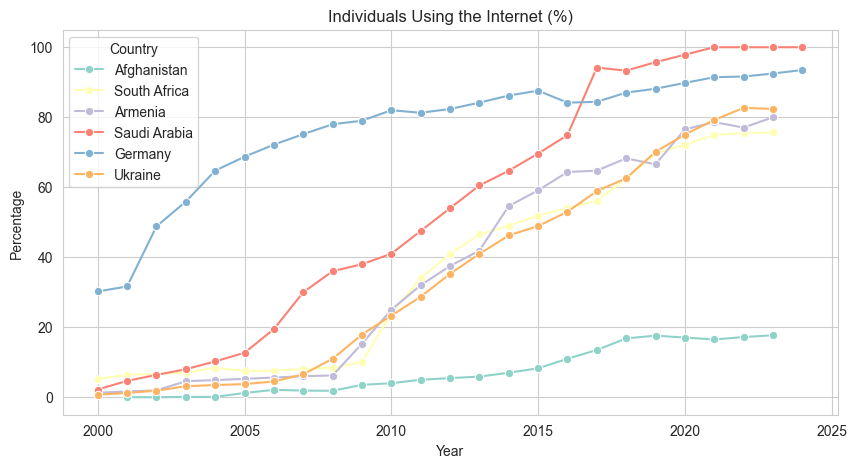

In [70]:
# Individuals Using the Internet (%)
df_plot = filter_countries(df_internet_users)

sns.lineplot(
    data=df_plot,
    x="dataYear",
    y="dataValue",
    hue="entityName",
    marker="o"
)
plt.title("Individuals Using the Internet (%)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Country")
plt.show()

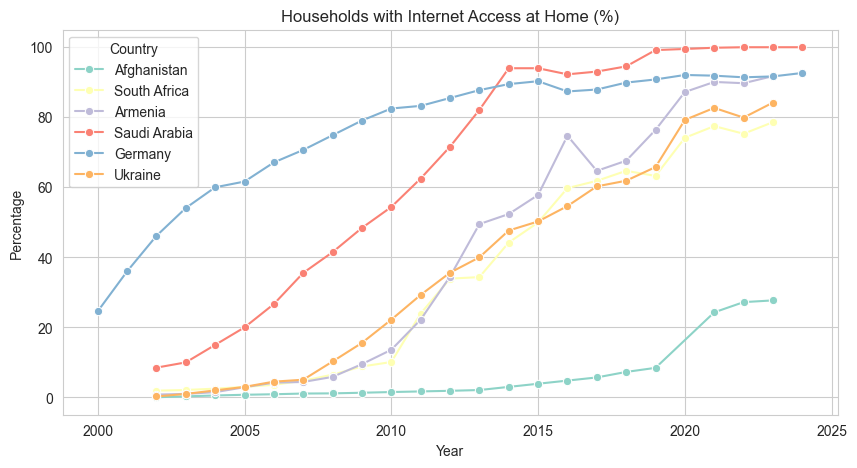

In [71]:
# Households with Internet Access at Home (%)
df_plot = filter_countries(df_household_internet)

sns.lineplot(
    data=df_plot,
    x="dataYear",
    y="dataValue",
    hue="entityName",
    marker="o"
)
plt.title("Households with Internet Access at Home (%)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Country")
plt.show()

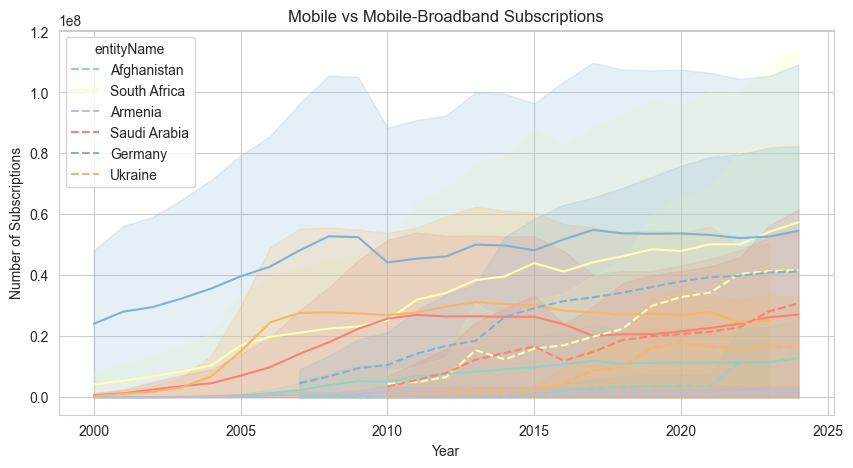

In [72]:
# Mobile vs Mobile-Broadband Subscriptions
fig, ax = plt.subplots()

sns.lineplot(
    data=filter_countries(df_mobile),
    x="dataYear",
    y="dataValue",
    hue="entityName",
    ax=ax,
    legend=False
)

sns.lineplot(
    data=filter_countries(df_mobile_bb),
    x="dataYear",
    y="dataValue",
    hue="entityName",
    linestyle="--",
    ax=ax
)

plt.title("Mobile vs Mobile-Broadband Subscriptions")
plt.xlabel("Year")
plt.ylabel("Number of Subscriptions")
plt.show()

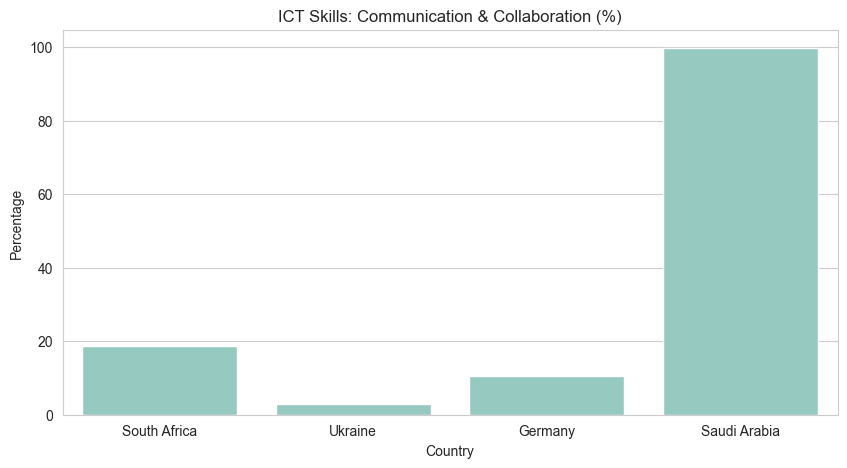

In [73]:
# ICT Skills — Communication & Collaboration (%)
latest_skills = (
    filter_countries(df_ict_skills)
    .sort_values("dataYear")
    .groupby("entityName")
    .tail(1)
)

sns.barplot(
    data=latest_skills,
    x="entityName",
    y="dataValue"
)
plt.title("ICT Skills: Communication & Collaboration (%)")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.show()

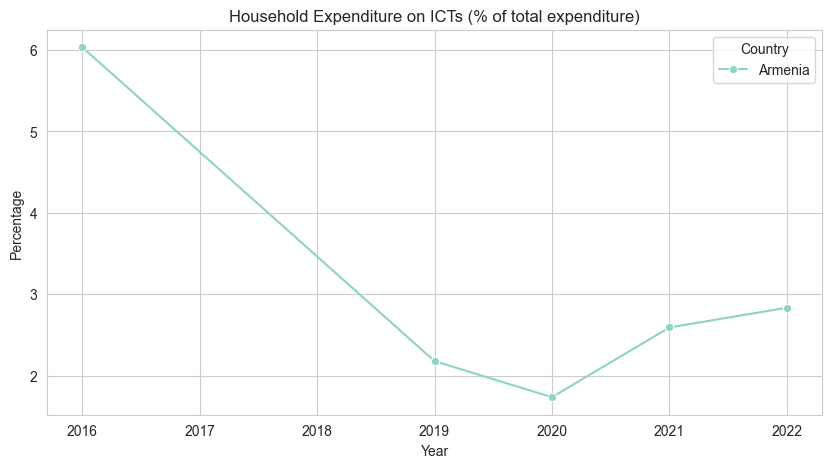

In [74]:
# Household Expenditure on ICTs (% of total expenditure)
df_plot = filter_countries(df_ict_exp)

sns.lineplot(
    data=df_plot,
    x="dataYear",
    y="dataValue",
    hue="entityName",
    marker="o"
)
plt.title("Household Expenditure on ICTs (% of total expenditure)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Country")
plt.show()

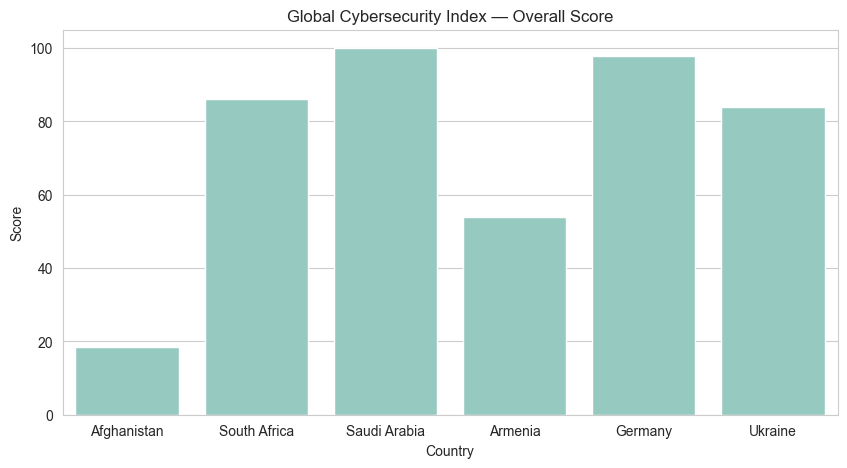

In [75]:
# Global Cybersecurity Index — Overall Score
latest_gci = (
    filter_countries(df_gci)
    .sort_values("dataYear")
    .groupby("entityName")
    .tail(1)
)

sns.barplot(
    data=latest_gci,
    x="entityName",
    y="dataValue"
)
plt.title("Global Cybersecurity Index — Overall Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.show()

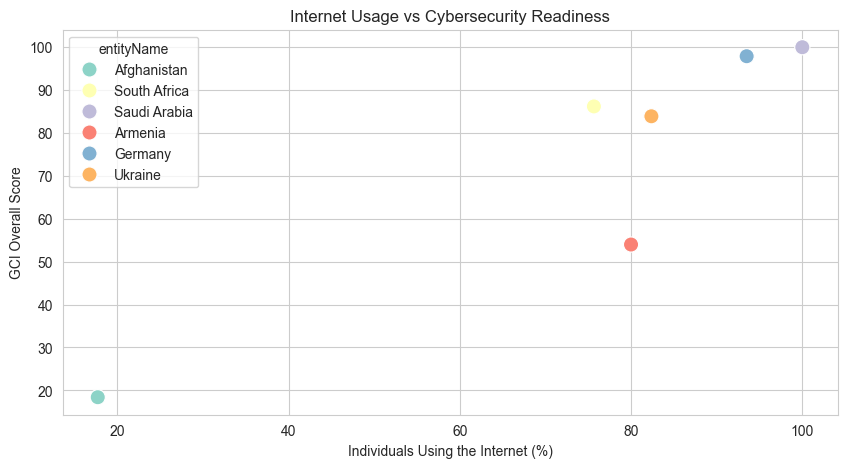

In [76]:
# Relationship: Internet Usage vs Cybersecurity Readiness
internet_latest = (
    filter_countries(df_internet_users)
    .sort_values("dataYear")
    .groupby("entityIso")
    .tail(1)
)

merged = pd.merge(
    latest_gci[["entityIso", "entityName", "dataValue"]],
    internet_latest[["entityIso", "dataValue"]],
    on="entityIso",
    suffixes=("_gci", "_internet")
)

sns.scatterplot(
    data=merged,
    x="dataValue_internet",
    y="dataValue_gci",
    hue="entityName",
    s=120
)

plt.title("Internet Usage vs Cybersecurity Readiness")
plt.xlabel("Individuals Using the Internet (%)")
plt.ylabel("GCI Overall Score")
plt.show()